<a href="https://colab.research.google.com/github/Armin-Abdollahi/Bone-Age-Estimation/blob/main/Bone_Age_VGG19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
# Load the labels
labels_path = '/content/drive/MyDrive/Digital_Hand_Atlas_Dataset/Total_Images/Bordered_XRay_Images/Label.csv'
labels = pd.read_csv(labels_path)

In [4]:
labels['Case ID'] = labels['Case ID'].apply(lambda x: str(x)+'.jpg')

labels.head()

,Case ID,Bone Age,Male,Location
0,1.jpg,0,False,Asian
1,2.jpg,0,False,Asian
2,3.jpg,0,False,Asian
3,4.jpg,0,False,Asian
4,5.jpg,0,False,Asian


In [5]:
# Ensure the 'Case ID' column is of type string
labels['Case ID'] = labels['Case ID'].astype(str)

In [6]:
# Create the image data generator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [7]:
# Create the train and validation generators
train_generator = datagen.flow_from_dataframe(
    dataframe=labels,
    directory='/content/drive/MyDrive/Digital_Hand_Atlas_Dataset/Total_Images/Bordered_XRay_Images',
    x_col='Case ID',
    y_col='Bone Age',
    target_size=(256, 256),
    color_mode='rgb',  # Change to 'rgb' for 3 channels
    class_mode='raw',
    batch_size=32,
    subset='training'
)

validation_generator = datagen.flow_from_dataframe(
    dataframe=labels,
    directory='/content/drive/MyDrive/Digital_Hand_Atlas_Dataset/Total_Images/Bordered_XRay_Images',
    x_col='Case ID',
    y_col='Bone Age',
    target_size=(256, 256),
    color_mode='rgb',  # Change to 'rgb' for 3 channels
    class_mode='raw',
    batch_size=32,
    subset='validation'
)

Found 5915 validated image filenames.
Found 1478 validated image filenames.


In [8]:
# Build the VGG19 model
base_model = VGG19(include_top=False, input_shape=(256, 256, 3))  # Adjust input shape
model = tf.keras.Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='linear')  # Linear activation for regression
])

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [9]:
# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae', 'accuracy'])

In [10]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32,
    epochs=10
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


184/184 ━━━━━━━━━━━━━━━━━━━━ 4005s 21s/step - accuracy: 0.0508 - loss: 493.4228 - mae: 10.5698 - val_accuracy: 0.0679 - val_loss: 16.4625 - val_mae: 3.5386
Epoch 2/10
  1/184 ━━━━━━━━━━━━━━━━━━━━ 1:59 654ms/step - accuracy: 0.0312 - loss: 22.3594 - mae: 4.0857

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


184/184 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - accuracy: 0.0312 - loss: 22.3594 - mae: 4.0857 - val_accuracy: 0.0000e+00 - val_loss: 16.4962 - val_mae: 3.5798
Epoch 3/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 329s 2s/step - accuracy: 0.0566 - loss: 26.1012 - mae: 4.1057 - val_accuracy: 0.0673 - val_loss: 6.8524 - val_mae: 2.1324
Epoch 4/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 25s 130ms/step - accuracy: 0.0625 - loss: 9.7810 - mae: 2.3450 - val_accuracy: 0.1667 - val_loss: 4.8298 - val_mae: 1.8662
Epoch 5/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 355s 2s/step - accuracy: 0.0536 - loss: 10.2334 - mae: 2.4302 - val_accuracy: 0.0795 - val_loss: 4.6115 - val_mae: 1.6555
Epoch 6/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 491us/step - accuracy: 0.0312 - loss: 6.7629 - mae: 2.1765 - val_accuracy: 0.0000e+00 - val_loss: 7.4081 - val_mae: 2.1508
Epoch 7/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 332s 2s/step - accuracy: 0.0560 - loss: 8.5989 - mae: 2.2254 - val_accuracy: 0.0679 - val_loss: 4.6994 - val_mae: 1.7508
Epoch 8/10
184/184 ━━━━━━━━━━

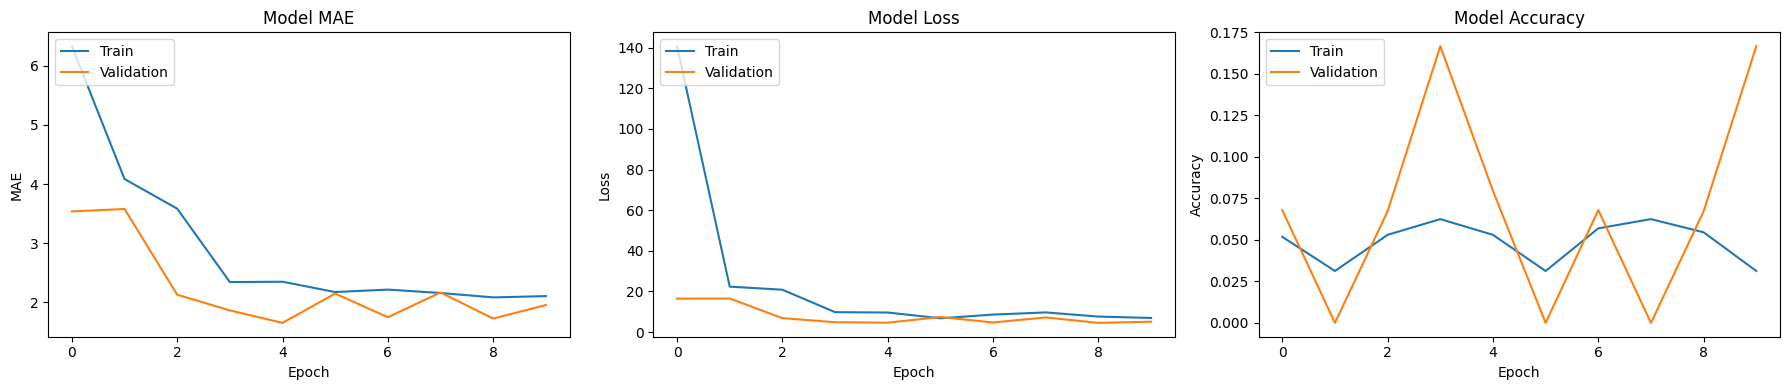

In [11]:
# Plot training & validation MAE values
plt.figure(figsize=(18, 4))

plt.subplot(1, 3, 1)
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation accuracy values
plt.subplot(1, 3, 3)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32,
    epochs=18
)

Epoch 1/18
184/184 ━━━━━━━━━━━━━━━━━━━━ 319s 2s/step - accuracy: 0.0542 - loss: 7.4982 - mae: 2.0813 - val_accuracy: 0.0673 - val_loss: 3.8999 - val_mae: 1.5132
Epoch 2/18
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 397us/step - accuracy: 0.0625 - loss: 4.4378 - mae: 1.5715 - val_accuracy: 0.1667 - val_loss: 0.6447 - val_mae: 0.5640
Epoch 3/18
184/184 ━━━━━━━━━━━━━━━━━━━━ 330s 2s/step - accuracy: 0.0563 - loss: 6.6267 - mae: 1.9685 - val_accuracy: 0.0679 - val_loss: 3.7842 - val_mae: 1.5377
Epoch 4/18
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 404us/step - accuracy: 0.0938 - loss: 6.5742 - mae: 2.0822 - val_accuracy: 0.0000e+00 - val_loss: 3.1844 - val_mae: 1.4826
Epoch 5/18
184/184 ━━━━━━━━━━━━━━━━━━━━ 309s 2s/step - accuracy: 0.0602 - loss: 6.6958 - mae: 1.9559 - val_accuracy: 0.0673 - val_loss: 3.3604 - val_mae: 1.4029
Epoch 6/18
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 426us/step - accuracy: 0.0625 - loss: 9.0238 - mae: 2.2719 - val_accuracy: 0.1667 - val_loss: 3.1702 - val_mae: 1.3971
Epoch 7/18
184/184 ━━━━━━━━

In [ ]:
# Plot training & validation MAE values
plt.figure(figsize=(18, 4))

plt.subplot(1, 3, 1)
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation accuracy values
plt.subplot(1, 3, 3)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()